# Decision Tree

## <font color = 'yellow'> Gini Index Calculation

In [1]:
import numpy as np

elements = ['A','A','A','C','B','C']

def counts(elements):
    classes = {}
    for element in elements:
        if element in classes:
            classes[element] += 1
        else:
            classes[element] = 1
    return [classes[e] for e in classes]

In [2]:
counts(elements)

[3, 2, 1]

In [6]:
import pandas as pd
num, uniques = pd.factorize(elements)

In [9]:
num, uniques

(array([0, 0, 0, 1, 2, 1]), array(['A', 'C', 'B'], dtype=object))

## <font color = 'yellow'> Gini Index

In [4]:
def gini(elements):
    cts = counts(elements)
    n = sum(cts)
    gini_index = 1 - sum([pi**2/n**2 for pi in cts])

    return  gini_index

In [5]:
gini(elements)

0.6111111111111112

## <font color = 'yellow'> Entropy Calculation

In [12]:
import numpy as np

def entropy(elements):
    if (len(elements)) == 0:
        return 0

    cts = counts(elements)
    n = sum(cts)
    props = 1/n * np.array(cts)
    return -np.dot(np.log2(props), props)

In [13]:
entropy(elements)

1.4591479170272448

In [15]:
for i in range(len(elements)):
    print("\n************")
    left = elements[:i]
    right = elements[i:]
    print(left, right)
    weighted_gini = 1/len(elements)*(gini(left)*len(left) + gini(right)*len(right))
    print("Weighted Gini:", weighted_gini)
    weighted_entropy = 1/len(elements)*(entropy(left)*len(left) + entropy(right)*len(right))
    print("Weighted entropy:", weighted_entropy)


************
[] ['A', 'A', 'A', 'C', 'B', 'C']
Weighted Gini: 0.6111111111111112
Weighted entropy: 1.4591479170272446

************
['A'] ['A', 'A', 'C', 'B', 'C']
Weighted Gini: 0.5333333333333333
Weighted entropy: 1.268273412406135

************
['A', 'A'] ['A', 'C', 'B', 'C']
Weighted Gini: 0.41666666666666663
Weighted entropy: 1.0

************
['A', 'A', 'A'] ['C', 'B', 'C']
Weighted Gini: 0.2222222222222222
Weighted entropy: 0.4591479170272448

************
['A', 'A', 'A', 'C'] ['B', 'C']
Weighted Gini: 0.41666666666666663
Weighted entropy: 0.8741854163060886

************
['A', 'A', 'A', 'C', 'B'] ['C']
Weighted Gini: 0.4666666666666667
Weighted entropy: 1.1424588287122237


___

# <font color = 'yellow'> App Reccomendation with Decison Tree

In [16]:
import pandas as pd
import numpy as np
from pylab import plt
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
import random
random.seed(42)

In [17]:
app_dataset = pd.DataFrame({
    'Platform': ['iPhone','iPhone','Android','iPhone','Android','Android'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})

In [18]:
app_dataset

,Platform,Age,App
0,iPhone,15,Atom Count
1,iPhone,25,Check Mate Mate
2,Android,32,Beehive Finder
3,iPhone,35,Check Mate Mate
4,Android,12,Atom Count
5,Android,14,Atom Count


## <font color = 'yellow'> with age as categorical feature

In [19]:
app_dataset_one_hot = pd.DataFrame(
    {'Platform_iPhone':[1,1,0,1,0,0],
     'Platform_Android':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Adult':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})

app_dataset_one_hot

,Platform_iPhone,Platform_Android,Age_Young,Age_Adult,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [20]:
X = app_dataset_one_hot[['Platform_iPhone', 'Platform_Android','Age_Adult', 'Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X,y)

# what a blunderous step btw... no validation set at all

1.0

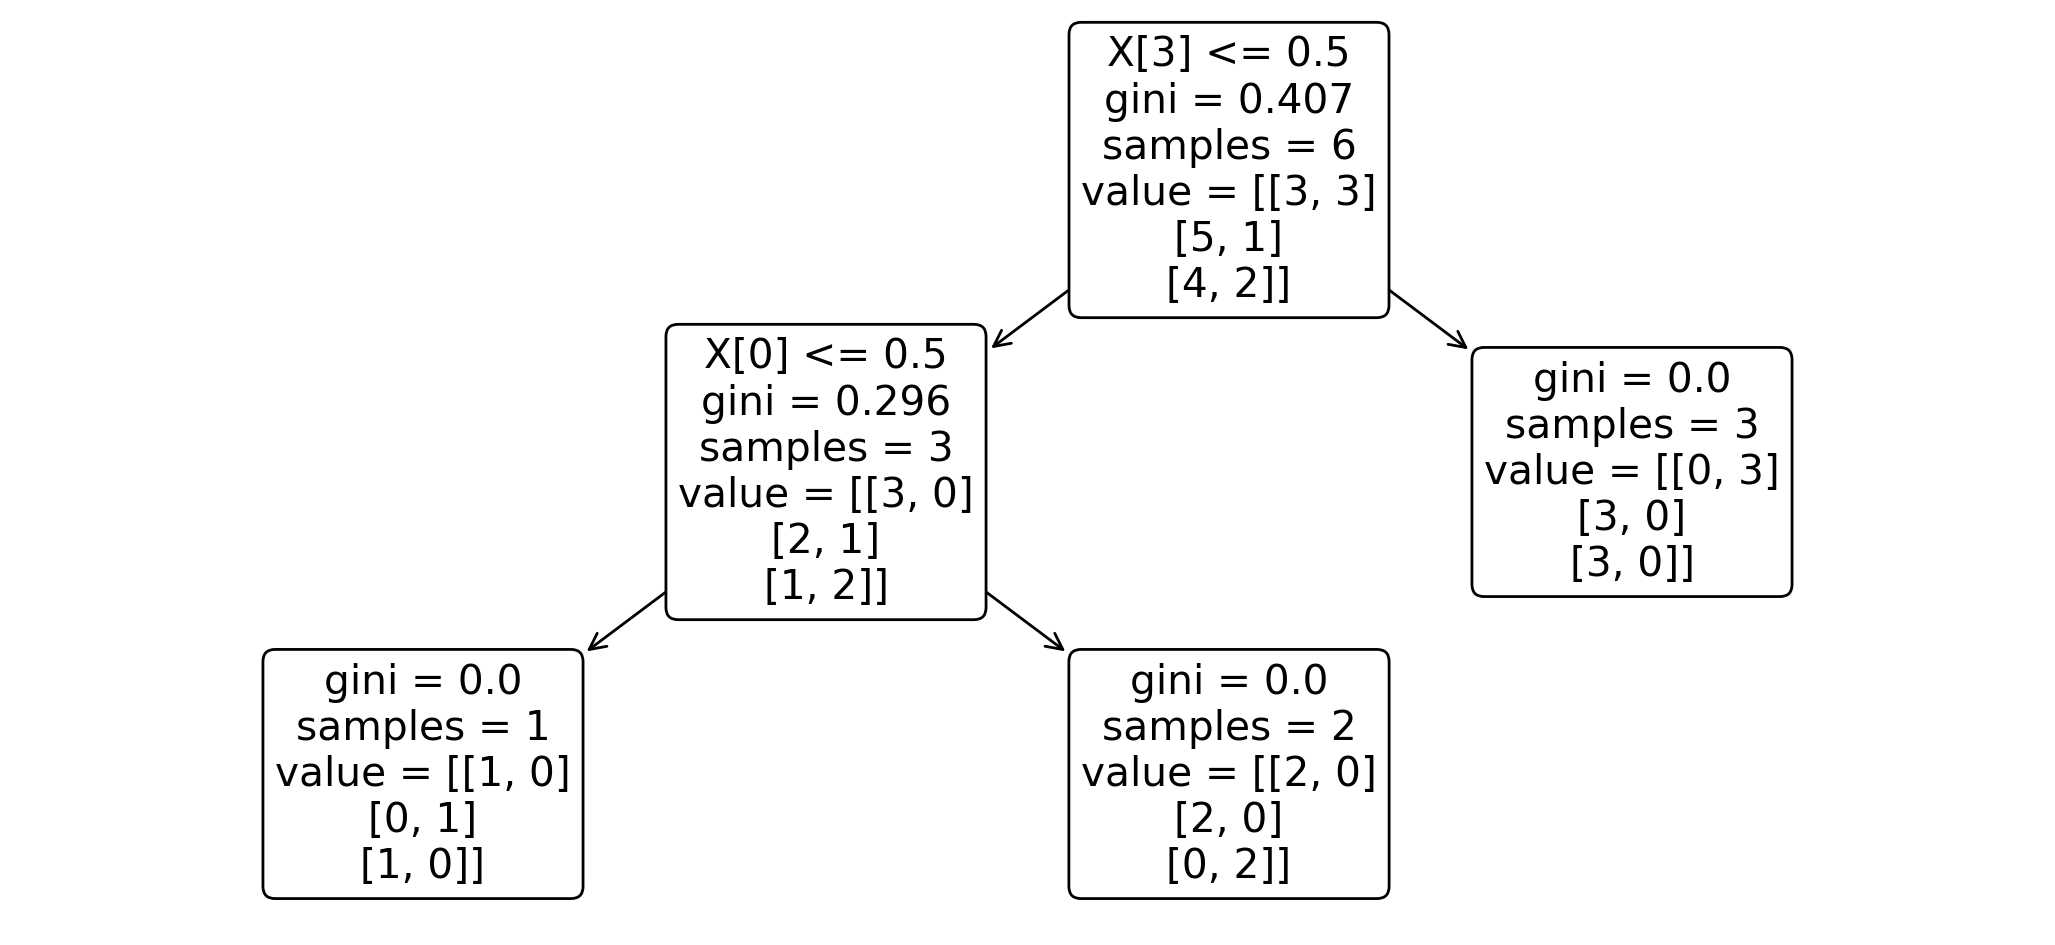

In [27]:
plt.figure(figsize=(13,6), dpi = 200)
tree.plot_tree(dt, rounded=True);

## <font color = 'yellow'> with age as numerical feature

In [29]:
app_dataset = pd.DataFrame({
    'Platform_iPhone':[1,1,0,1,0,0],
    'Platform_Android':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})

app_dataset

,Platform_iPhone,Platform_Android,Age,App
0,1,0,15,Atom Count
1,1,0,25,Check Mate Mate
2,0,1,32,Beehive Finder
3,1,0,35,Check Mate Mate
4,0,1,12,Atom Count
5,0,1,14,Atom Count


In [30]:
features = app_dataset[['Age','Platform_iPhone','Platform_Android']]
features

,Age,Platform_iPhone,Platform_Android
0,15,1,0
1,25,1,0
2,32,0,1
3,35,1,0
4,12,0,1
5,14,0,1


In [31]:
labels = app_dataset['App']
labels

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object

In [32]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

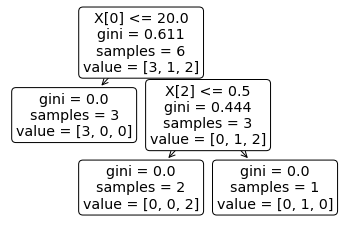

In [33]:
tree.plot_tree(app_model, rounded=True);

----

# <font color = 'yellow'> Regression Decision Tree

In [36]:
import numpy as np
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')


In [44]:
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (13,6)
matplotlib.rcParams['figure.dpi'] = 200

In [45]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]

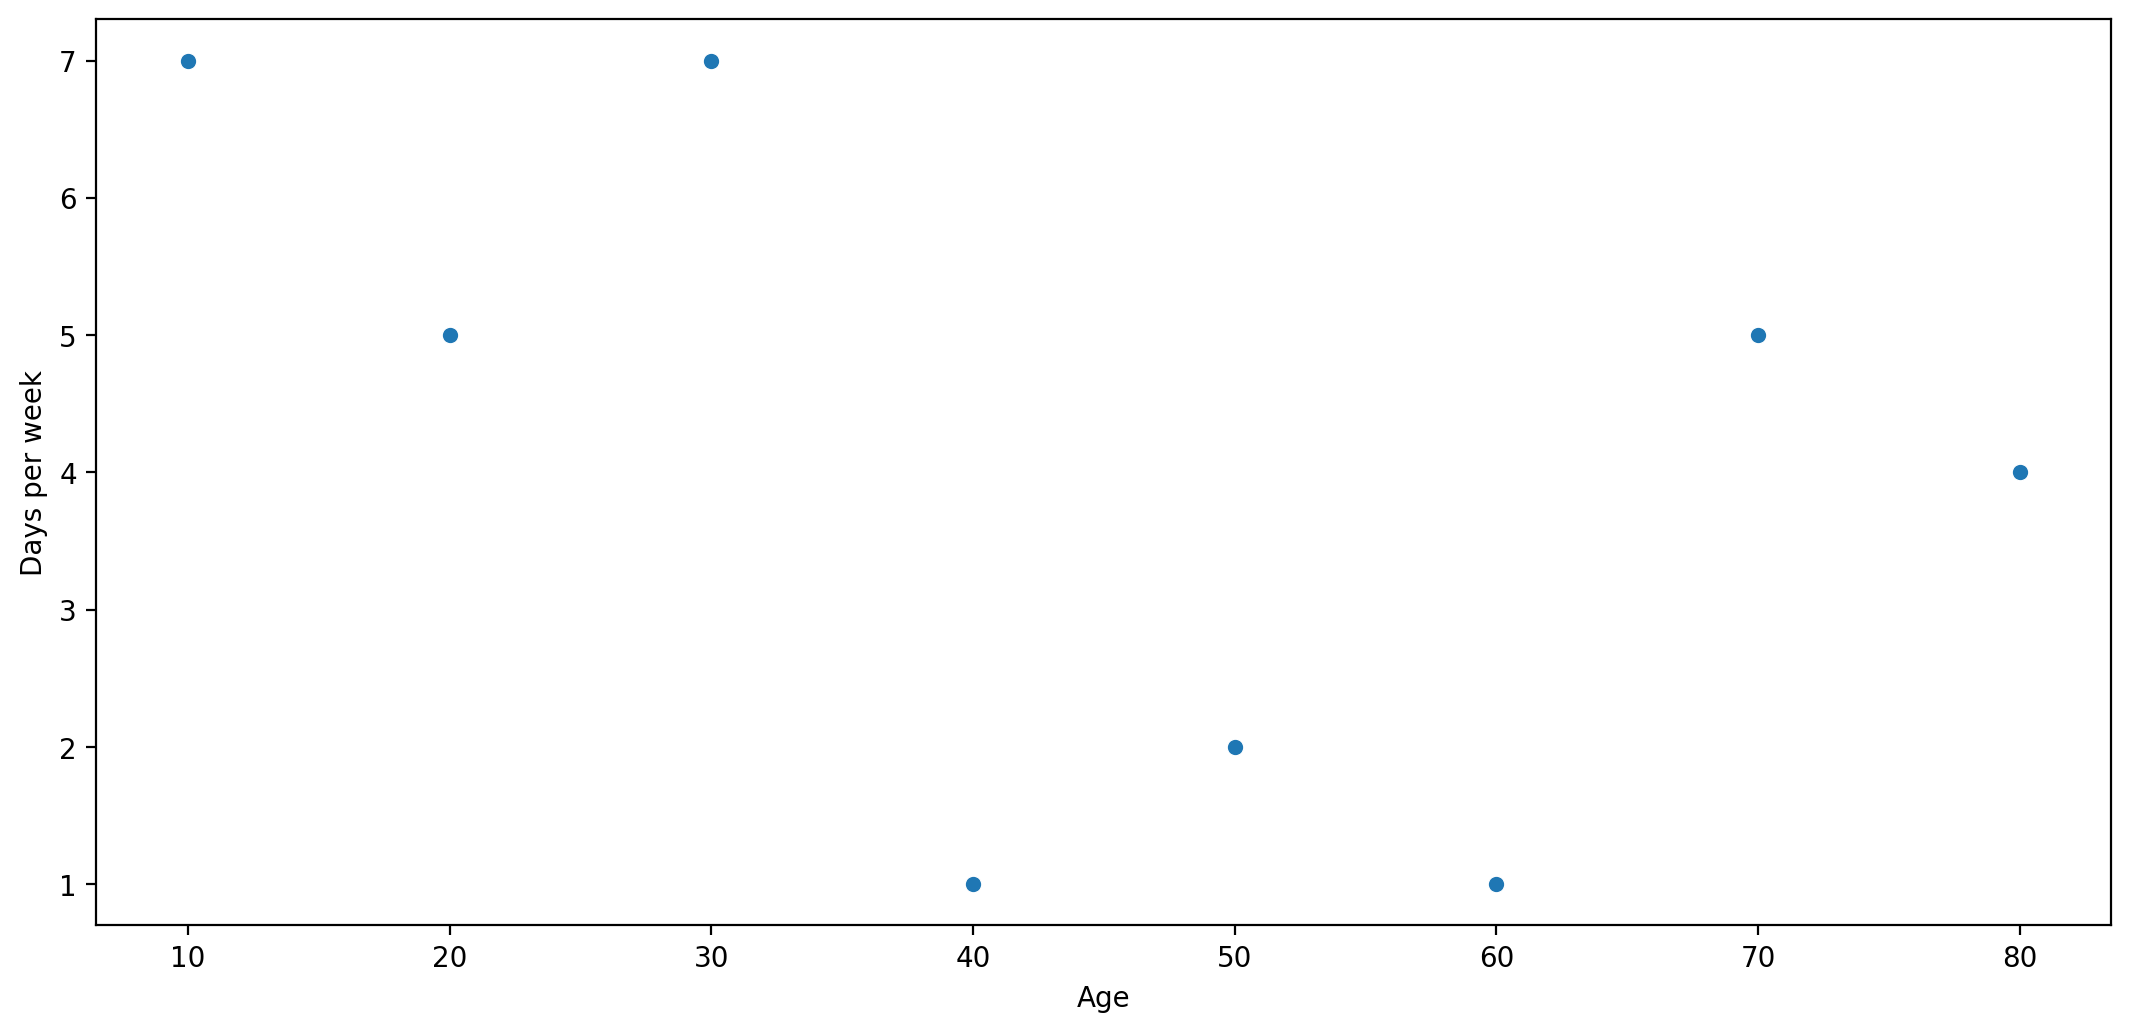

In [46]:
# flattenig the list
import itertools

flat_features = list(itertools.chain(*features))

sns.scatterplot(x = flat_features, y = labels)
plt.xlabel('Age')
plt.ylabel('Days per week')
plt.show()

In [47]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

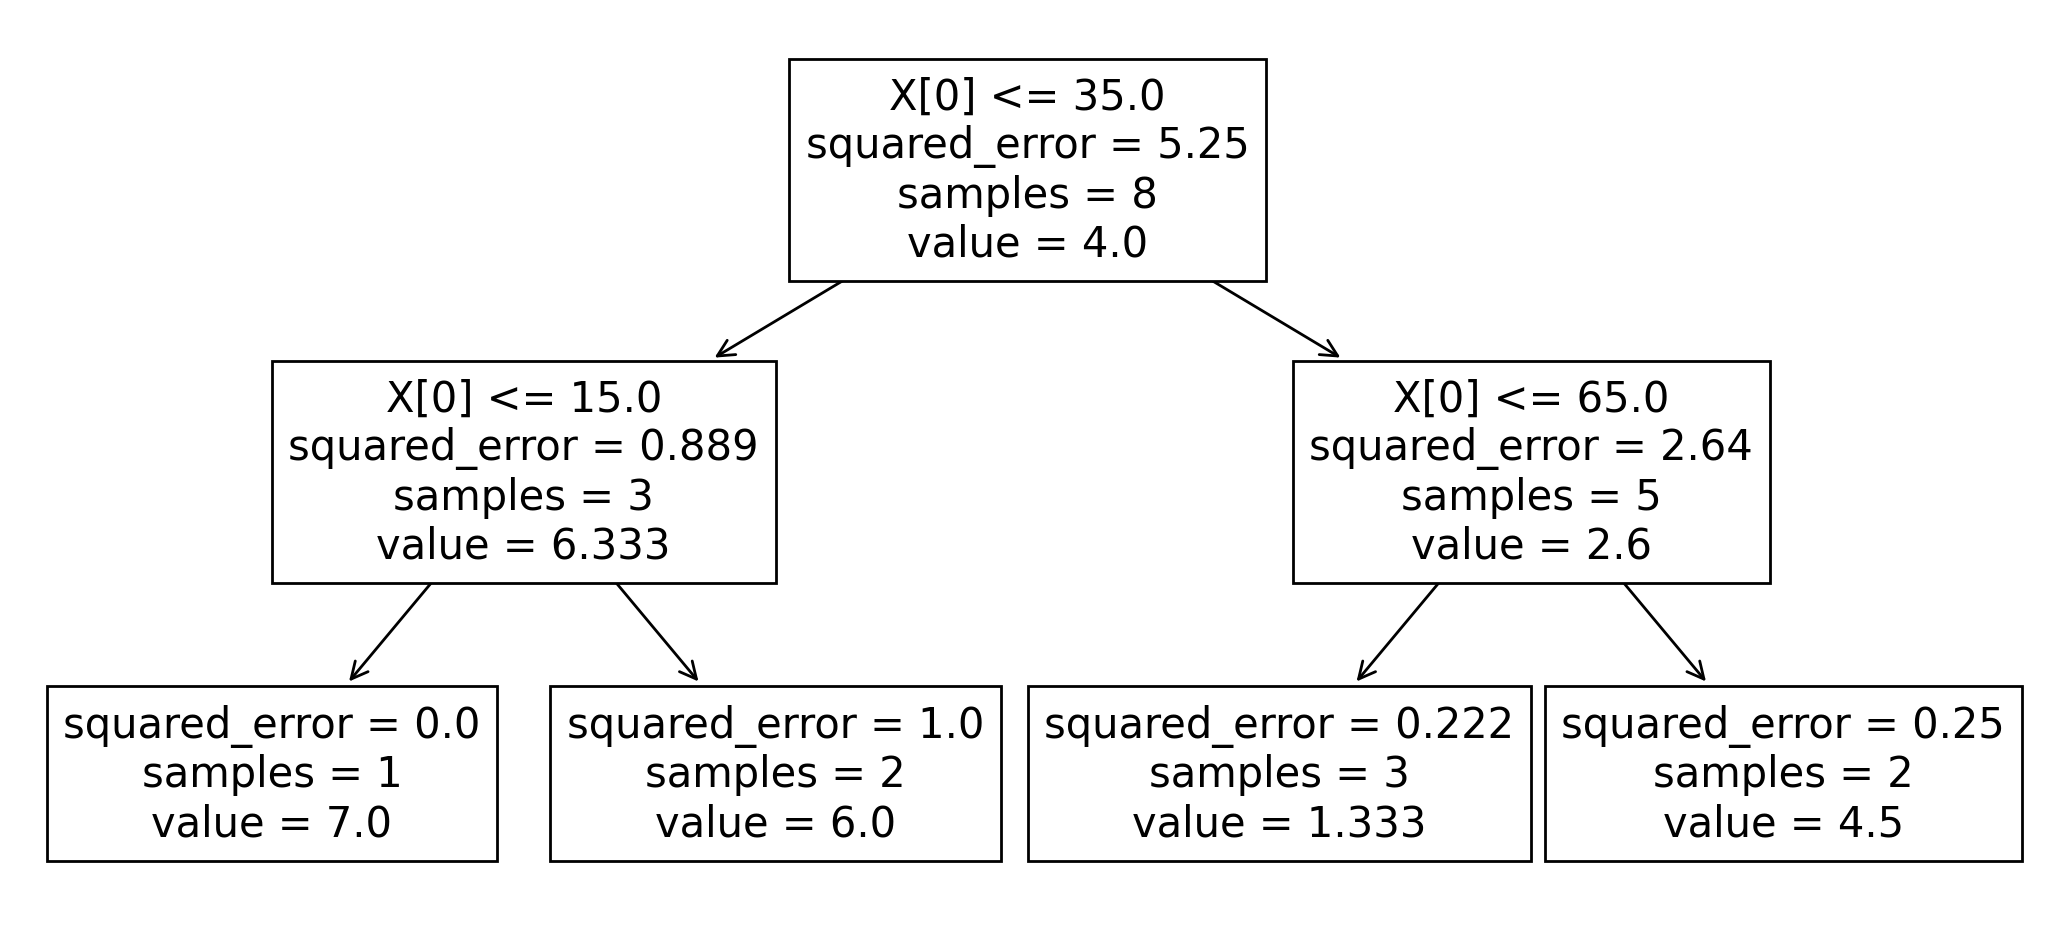

In [49]:
tree.plot_tree(dt_regressor);

---

# <font color = 'yellow'> University Admission

In [50]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [51]:
data['Admitted'] = data['Chance of Admit'] >= 0.75

In [52]:
data = data.drop(['Chance of Admit'], axis=1)

In [53]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,True
396,397,325,107,3,3.0,3.5,9.11,1,True
397,398,330,116,4,5.0,4.5,9.45,1,True
398,399,312,103,3,3.5,4.0,8.78,0,False


In [54]:
features = data.drop(['Admitted'], axis = 1)
labels = data['Admitted']

In [55]:
features

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [56]:
labels

0       True
1       True
2      False
3       True
4      False
       ...  
395     True
396     True
397     True
398    False
399     True
Name: Admitted, Length: 400, dtype: bool

## <font color = 'yellow'> Training a Tree

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X = features, y = labels)

DecisionTreeClassifier()

In [58]:
dt.predict(X=features[0:5])

array([ True,  True, False,  True, False])

In [60]:
labels[0:5]

0     True
1     True
2    False
3     True
4    False
Name: Admitted, dtype: bool

In [61]:
dt.score(X = features, y=labels)

1.0

In [70]:
import numpy as np
from matplotlib import pyplot

# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = size_of_points,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = size_of_points,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    #pyplot.xlabel('GRE')
    #pyplot.ylabel('TOEFL')
    #pyplot.legend(['Admitted','Not admitted'])

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    pyplot.show()

def display_tree(dt):
    from six import StringIO
    from IPython.display import Image
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000)
    pyplot.scatter(features, labels)
    pyplot.plot(x, model.predict(x.reshape([-1,1])))
    pyplot.xlabel("Age")
    pyplot.ylabel("Days per week")
    pyplot.show()

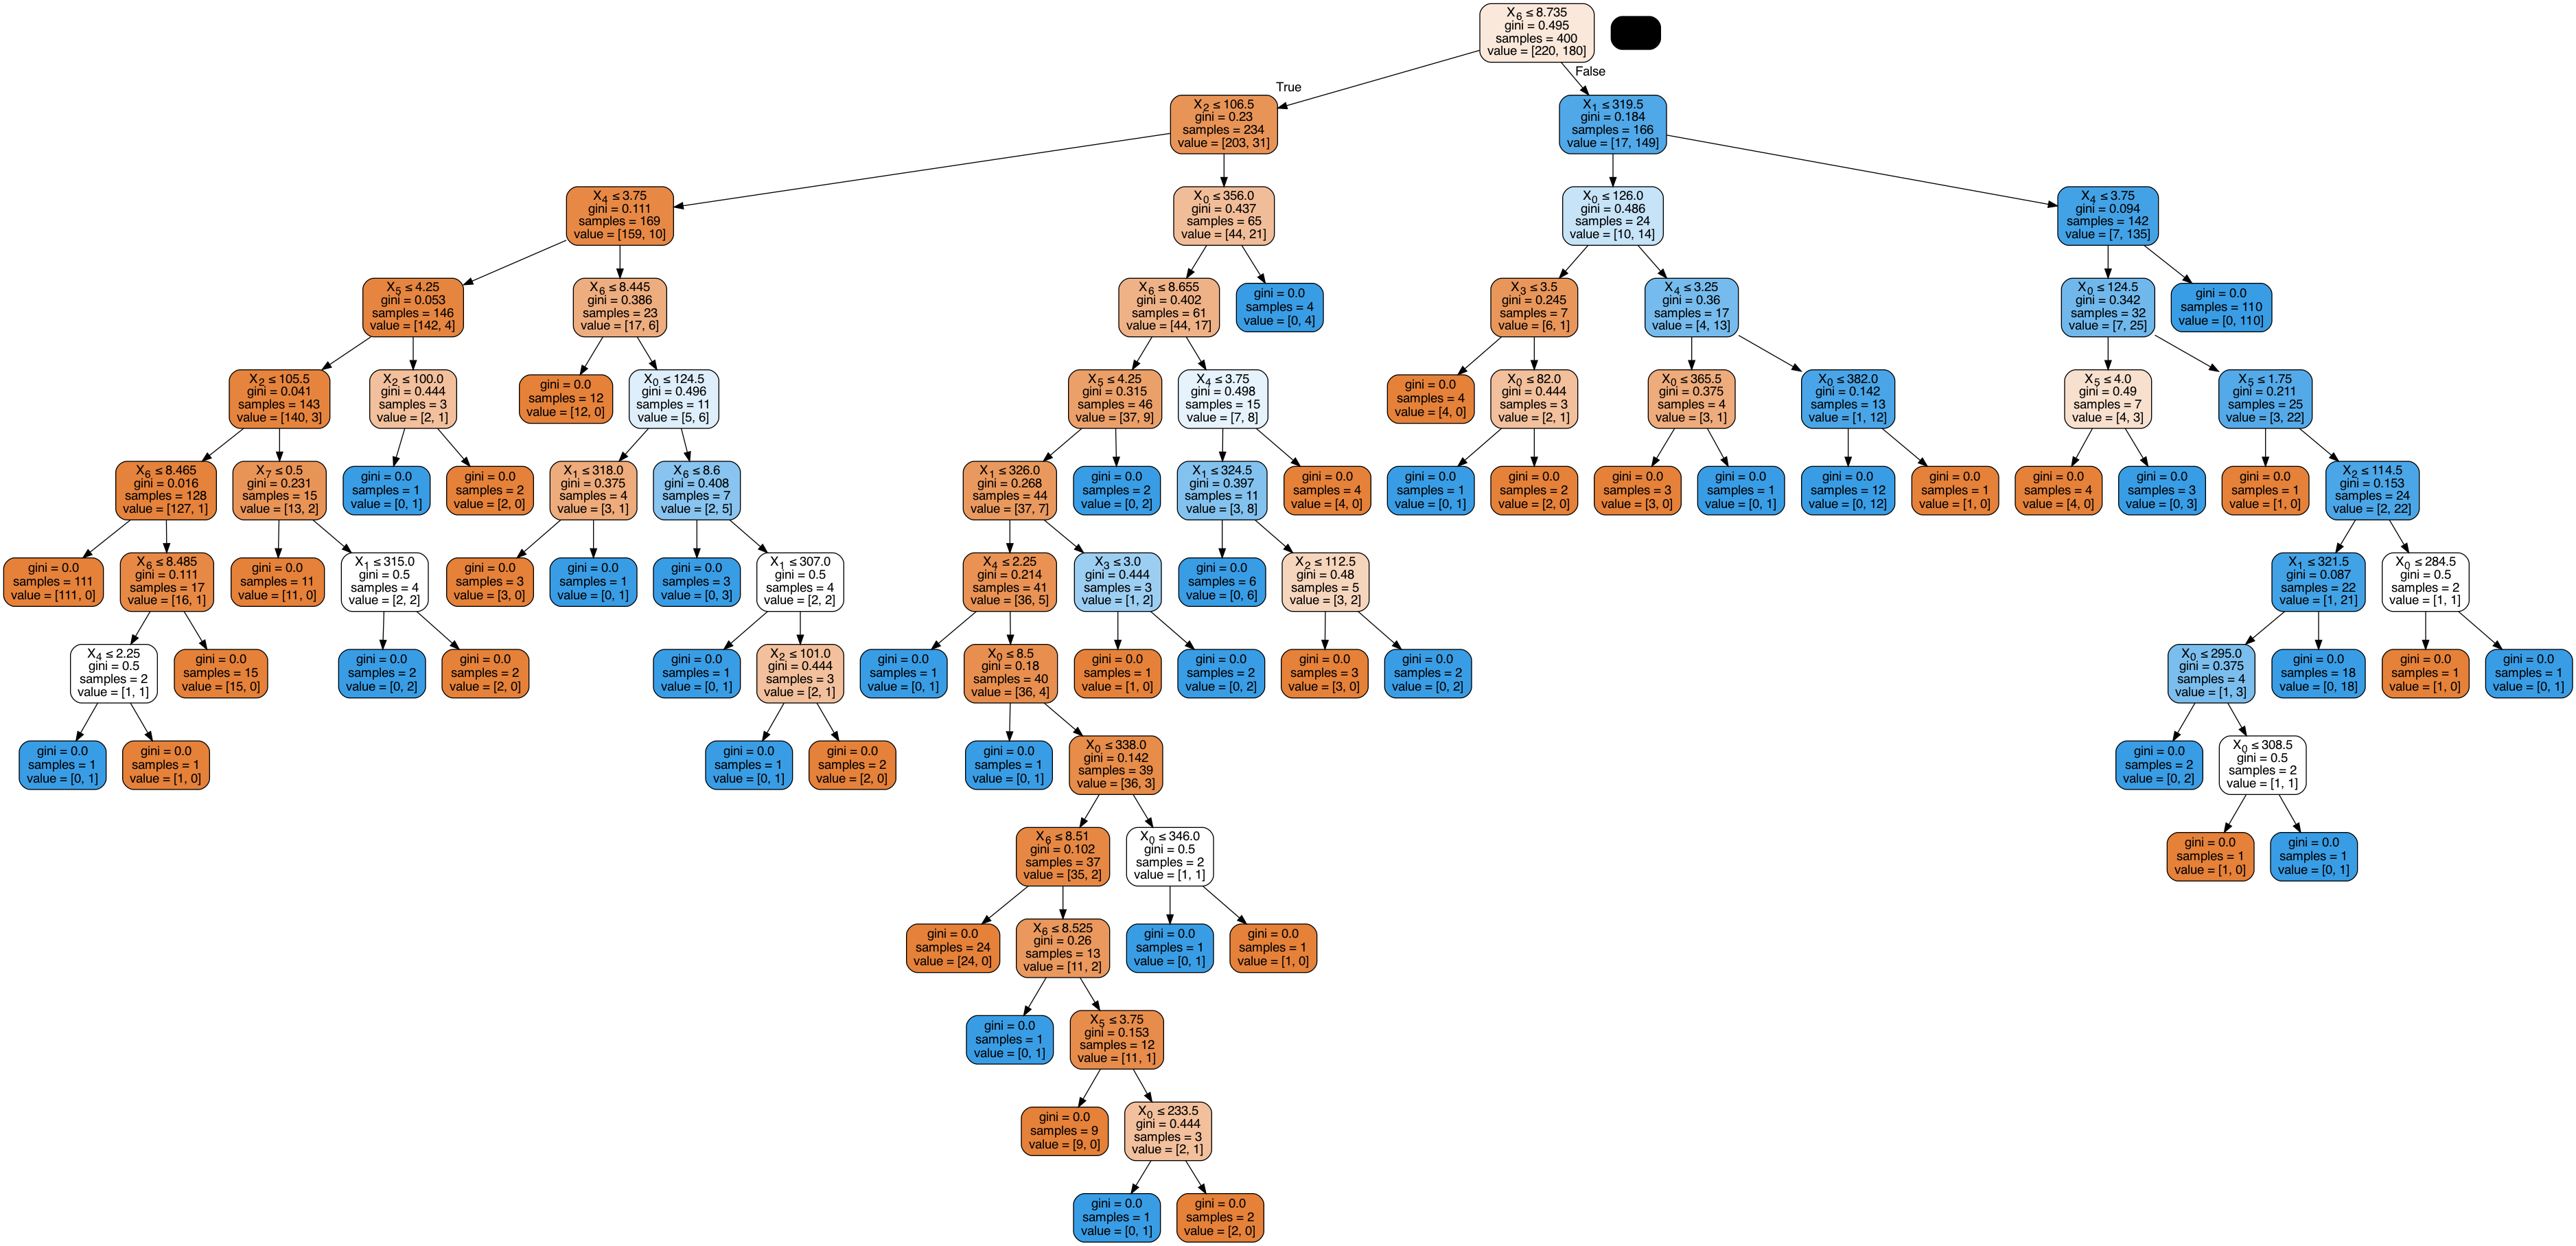

In [69]:
display_tree(dt)

## <font color = 'yellow'> Training a Smaller Tree

In [78]:
features = features.drop('Serial No.', axis = 1)

In [79]:
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(X=features, y=labels)
dt_smaller.score(X=features, y=labels)

0.885

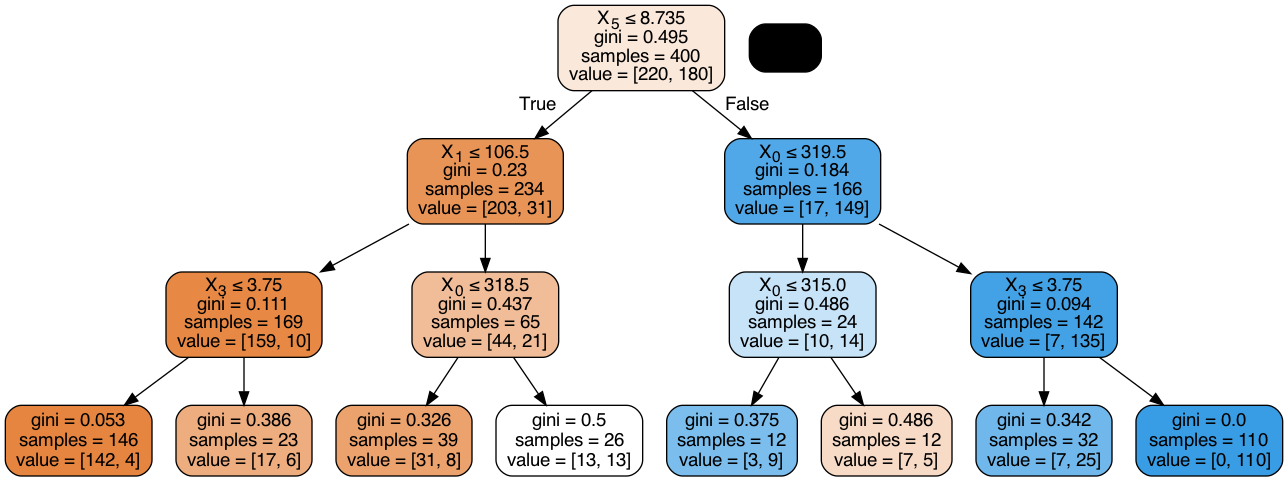

In [80]:
display_tree(dt_smaller)

In [83]:
import warnings
warnings.filterwarnings(action='ignore')

In [84]:
dt_smaller.predict([[320,110,3,4,3.5,8.9,0]])

array([ True])

In [85]:
dt_smaller.predict([[320,110,3,4,3.5,8,0]])

array([False])

## <font color = 'yellow'> Tree with only two features

In [86]:
exams = data[['GRE Score', 'TOEFL Score']]
exams

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103
...,...,...
395,324,110
396,325,107
397,330,116
398,312,103


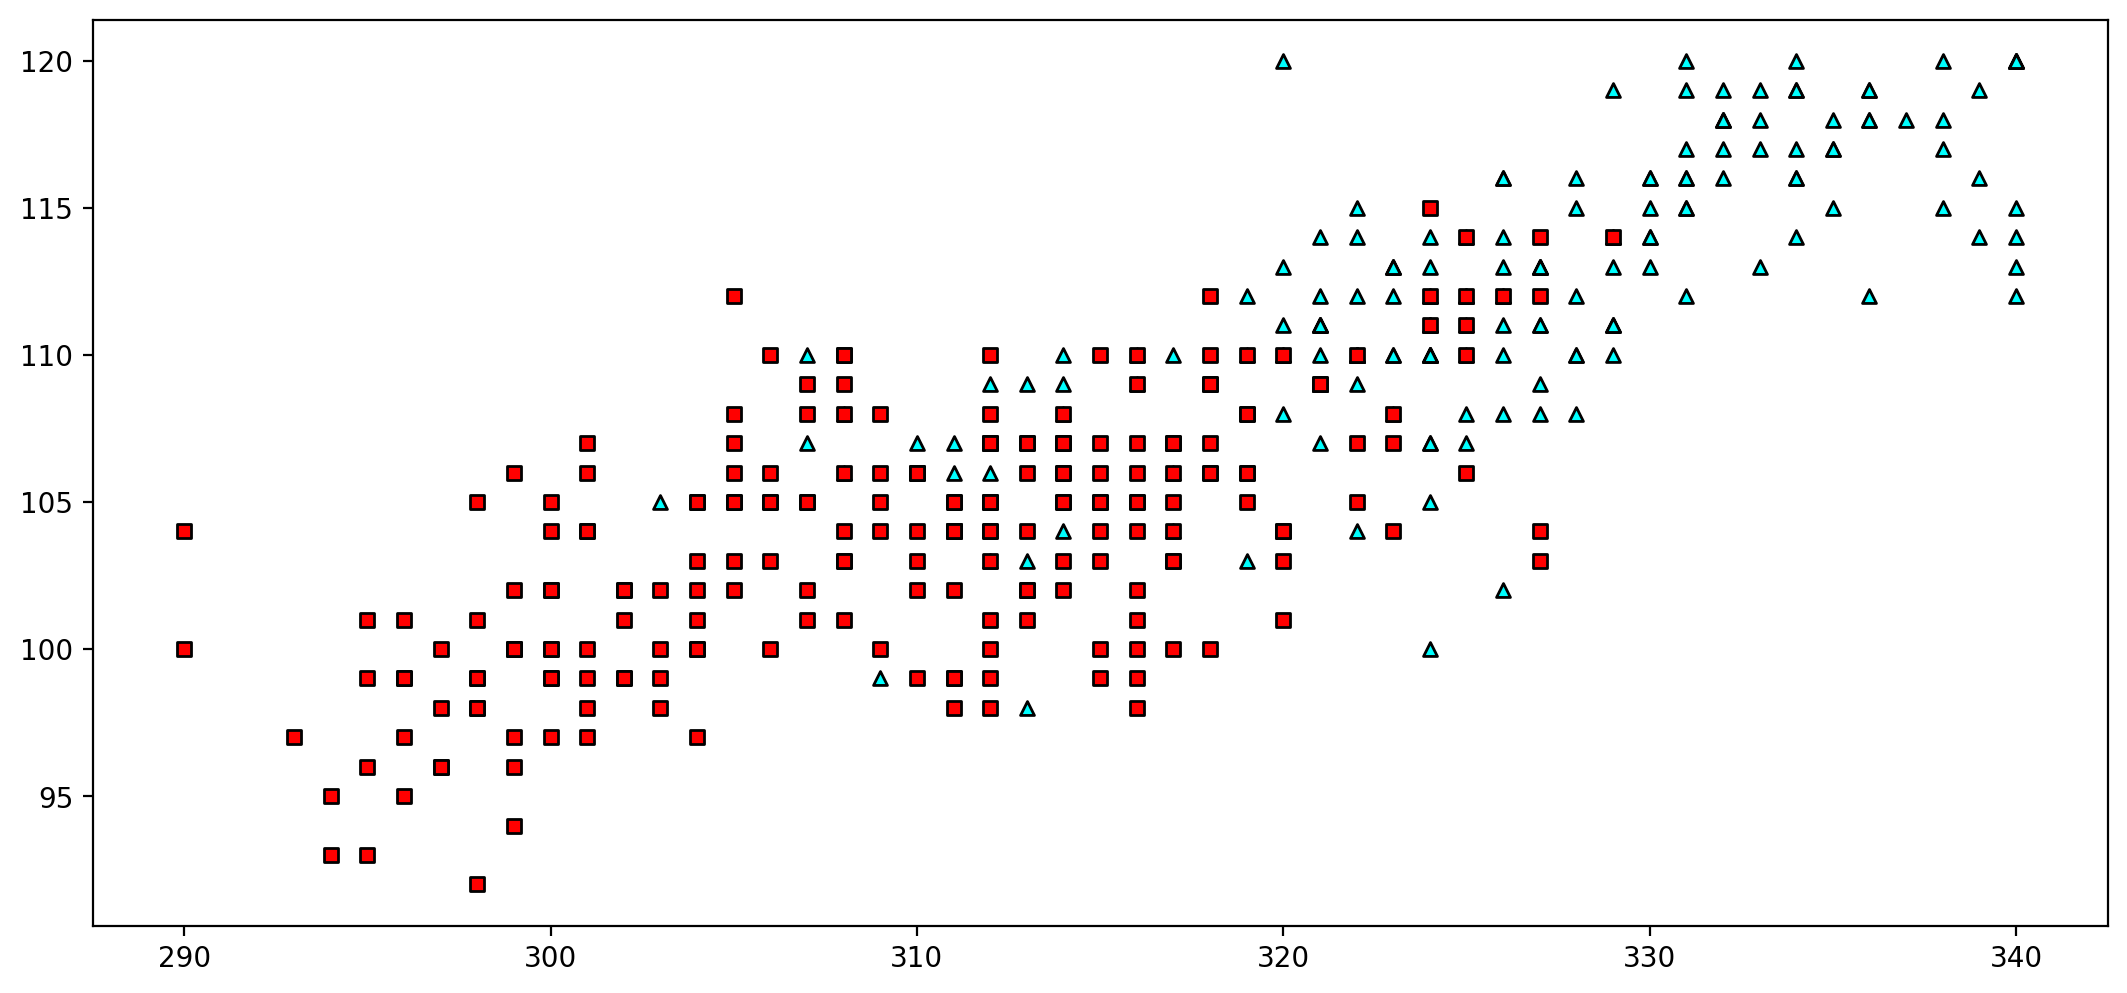

In [87]:
plot_points(exams, labels, size_of_points=25)

---

In [89]:
dt_exams = DecisionTreeClassifier(max_depth=2)

In [90]:
dt_exams.fit(exams, labels)

DecisionTreeClassifier(max_depth=2)

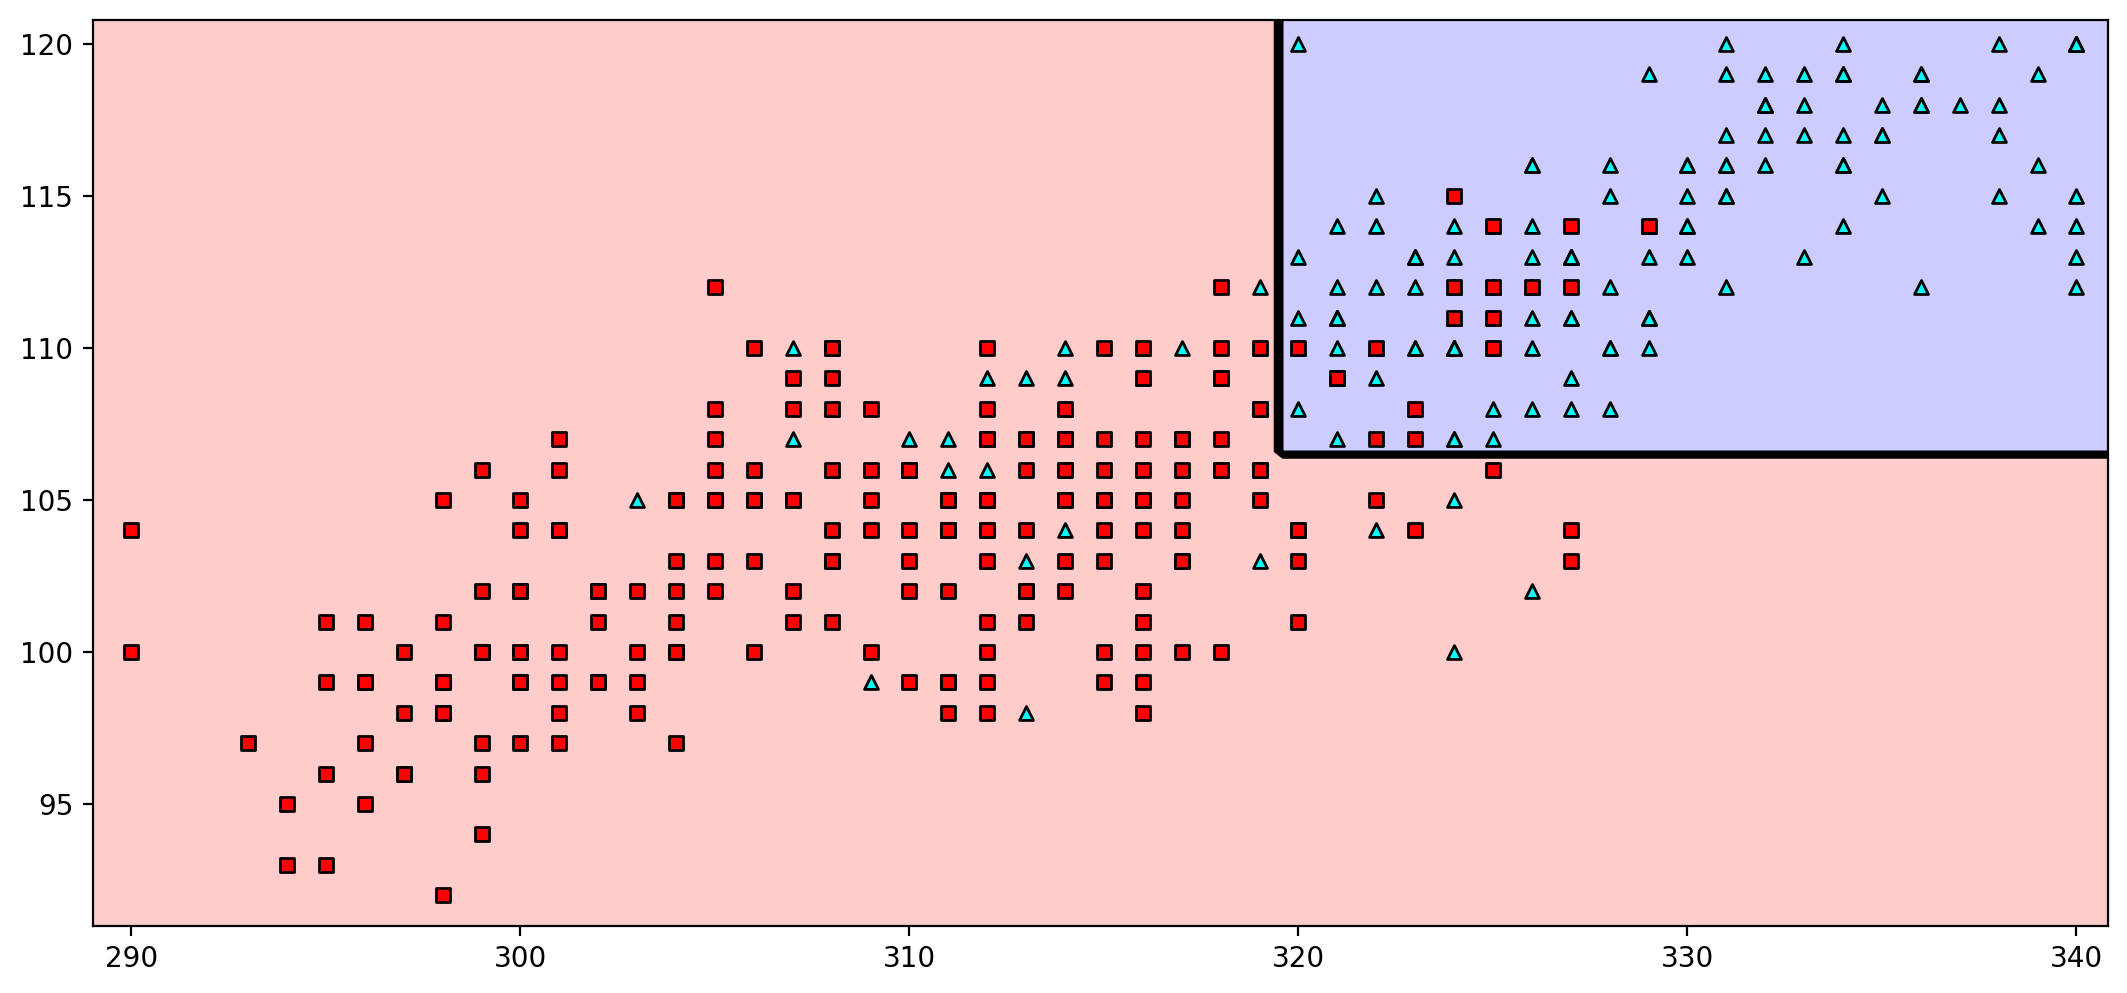

In [91]:
plot_model(exams, labels, dt_exams, size_of_points=25)

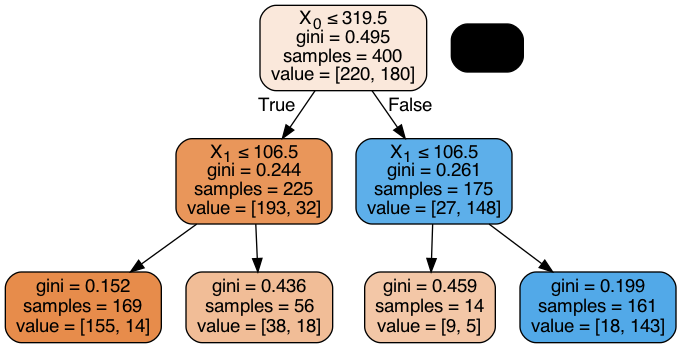

In [92]:
display_tree(dt_exams)